In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df=pd.read_csv("weather.csv")
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [2]:
df = df.fillna(0)

In [3]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
#df.drop(['WindGustDir','WindDir9am','WindDir3pm','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am'], axis = 1,inplace=True)


In [4]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am'], axis = 1,inplace=True)

In [5]:
df["MinTemp"] =df['MinTemp'].astype('int')
df["MaxTemp"] =df['MaxTemp'].astype('int')
df["Rainfall"] =df['Rainfall'].astype('int')
df["Pressure9am"] =df['Pressure9am'].astype('int')
df["Pressure3pm"] =df['Pressure3pm'].astype('int')
df["Temp9am"] =df['Temp9am'].astype('int')
df["Temp3pm"] =df['Temp3pm'].astype('int')
df["RISK_MM"] =df['RISK_MM'].astype('int')
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

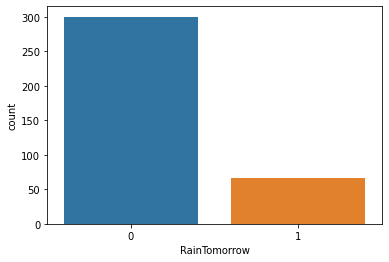

In [6]:
sns.countplot(x='RainTomorrow',data=df)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MinTemp       366 non-null    int32
 1   MaxTemp       366 non-null    int32
 2   Rainfall      366 non-null    int32
 3   WindSpeed3pm  366 non-null    int64
 4   Humidity9am   366 non-null    int64
 5   Humidity3pm   366 non-null    int64
 6   Pressure9am   366 non-null    int32
 7   Pressure3pm   366 non-null    int32
 8   Cloud9am      366 non-null    int64
 9   Cloud3pm      366 non-null    int64
 10  Temp9am       366 non-null    int32
 11  Temp3pm       366 non-null    int32
 12  RainToday     366 non-null    int64
 13  RISK_MM       366 non-null    int32
 14  RainTomorrow  366 non-null    int64
dtypes: int32(8), int64(7)
memory usage: 31.6 KB


In [8]:
print(df.corr())

               MinTemp   MaxTemp  Rainfall  WindSpeed3pm  Humidity9am  \
MinTemp       1.000000  0.752363  0.195957     -0.064376    -0.202972   
MaxTemp       0.752363  1.000000 -0.067004     -0.167210    -0.358741   
Rainfall      0.195957 -0.067004  1.000000      0.053079     0.141696   
WindSpeed3pm -0.064376 -0.167210  0.053079      1.000000    -0.266092   
Humidity9am  -0.202972 -0.358741  0.141696     -0.266092     1.000000   
Humidity3pm  -0.042163 -0.533594  0.277103     -0.026368     0.546718   
Pressure9am  -0.504027 -0.290131 -0.327437     -0.358892     0.135920   
Pressure3pm  -0.498595 -0.375290 -0.244113     -0.337971     0.134628   
Cloud9am      0.213434 -0.174337  0.171247     -0.026426     0.392842   
Cloud3pm      0.120101 -0.136786  0.120228      0.007207     0.271938   
Temp9am       0.914748  0.868333  0.081699     -0.020993    -0.434033   
Temp3pm       0.725199  0.986773 -0.082947     -0.187757    -0.358317   
RainToday     0.227705 -0.064469  0.678244      0.0

In [9]:
df.isnull().sum()


MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
RainTomorrow    0
dtype: int64

In [10]:
X=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1)


In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
log=LogisticRegression()


In [15]:
logmodel=log.fit(X_train,y_train)


C:\Users\26jan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
df.head(5)


,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8,24,0,20,68,29,1019,1015,7,7,14,23,0,3,1
1,14,26,3,17,80,36,1012,1008,5,3,17,25,1,3,1
2,13,23,3,6,82,69,1009,1007,8,7,15,20,1,39,1
3,13,15,39,24,62,56,1005,1007,2,7,13,14,1,2,1
4,7,16,2,28,68,49,1018,1018,7,7,11,15,1,0,0


In [17]:
from sklearn.metrics import accuracy_score


In [18]:
pred=log.predict(X_test)


In [19]:
accuracy_score(y_test,pred)


0.9766536964980544

In [20]:
from sklearn.metrics import *
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       212\n           1       0.98      0.89      0.93        45\n\n    accuracy                           0.98       257\n   macro avg       0.98      0.94      0.96       257\nweighted avg       0.98      0.98      0.98       257\n'

In [21]:
confusion_matrix(y_test,pred)


array([[211,   1],
       [  5,  40]], dtype=int64)

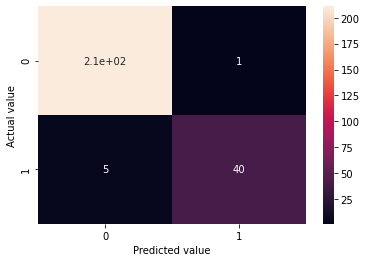

In [22]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

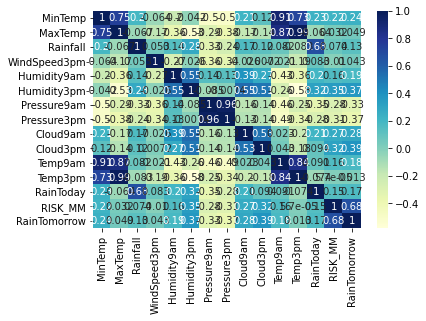

In [23]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)








In [24]:
print(pred)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0]


In [25]:
!pip install gradio

In [26]:
def classify(num):
    if num==0:
        return 'No rain tomorrow'
    else:
        return 'Rain tomorrow'

In [27]:
import gradio as gr
import numpy as np

def predict_weather(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14):
    input_array=np.array([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14]])
    prediction=logmodel.predict(input_array)
    output=classify(prediction[0])
    if output=='No rain tomorrow':
      return [(0,output)]
    else:
      return [(1,output)]

In [ ]:
v1 = gr.inputs.Slider(minimum=0, maximum=24, default=2, label="Minimum Temperature")
v2 = gr.inputs.Slider(minimum=0, maximum=40, default=2, label="Max Temperature")
v3 = gr.inputs.Slider(minimum=0, maximum=40, default=2, label="Rainfall")
v4 = gr.inputs.Slider(minimum=0, maximum=50, default=2, label="Wind speed at 3pm")
v5 = gr.inputs.Slider(minimum=0, maximum=100, default=2, label="Humidity at 9am")
v6 = gr.inputs.Slider(minimum=0, maximum=100, default=2, label="Humidity at 3pm")
v7 = gr.inputs.Slider(minimum=0, maximum=1035, default=2, label="Pressure at 9am")
v8 = gr.inputs.Slider(minimum=0, maximum=1035, default=2, label="Pressure at 3pm")
v9 = gr.inputs.Slider(minimum=0, maximum=10, default=2, label="Cloud 9am")
v10 = gr.inputs.Slider(minimum=0, maximum=10, default=2, label="Cloud 3pm")
v11 = gr.inputs.Slider(minimum=0, maximum=36, default=2, label="Temp 9am")
v12 = gr.inputs.Slider(minimum=0, maximum=36, default=2, label="Temp 3pm")
v13 = gr.inputs.Slider(minimum=0, maximum=1, default=2, label="Rain today")
v14 = gr.inputs.Slider(minimum=0, maximum=40, default=2, label="Risk MM")

op=gr.outputs.HighlightedText(color_map={ "No rain tomorrow": "lightgreen",
        "Rain tomorrow": "pink",})

gr.Interface(predict_weather, inputs=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14], outputs=op,live=True).launch(debug=True,share=True)

C:\Users\26jan\anaconda3\lib\site-packages\gradio\inputs.py:88: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\26jan\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\26jan\anaconda3\lib\site-packages\gradio\outputs.py:239: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\26jan\anaconda3\lib\site-packages\gradio\components.py:2942: UserWarning: The 'color_map' parameter has been moved from the constructor to `HighlightedText.style()` 
  warnings.warn(
C:\Users\26jan\anaconda3\lib\site-packages\gradio\blocks.py:152: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
C:\Users\26jan\anaconda3\lib\site-packages\gradi

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://13956.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
